In [1]:
# import
import numpy as np
import pandas as pd
import re
import tldextract
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# import whois
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df1 = pd.read_csv('./phishing_site_urls.csv')
df2 = pd.read_csv('./out.csv')

In [3]:
df2 = df2.rename(columns={'url': 'URL', 'label': 'Label'})
df2 = df2[['URL', 'Label']]
df = pd.concat([df1, df2], axis=0)
df['Label'] = df['Label'].astype(str)
df['URL'] = df['URL'].astype(str)
df

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
2499995,http://atualizacao.novoatendimentocaixa.ml/sinbc,phishing
2499996,https://ingcomptebe-1cd7e.firebaseapp.com,phishing
2499997,http://yonphweisdowedych.chaseonlinemarketing....,phishing
2499998,http://alternateangle.in/~pugepupgee/.wkwk/lkd...,phishing


In [4]:
# helper methods
def extract_subdir_TLD(url):
    splitted = re.split(r'(?<!/)/(?!/)', url)
    return 1 if any('.' in part for part in splitted[1:]) else 0

def count_www_outside_domain(url):
    splitted = re.split(r'(?<!/)/(?!/)', url)
    return sum(1 for part in splitted[1:] if 'www' in part)

def count_subdomain(url):
    extracted = tldextract.extract(url)
    return 0 if len(extracted.subdomain) == 0 else extracted.subdomain.count('.') + 1

def digit_letter_ratio(url):
    splitted = list(url)
    splitted = list(map(lambda x: 0 if str(x).isalpha() else 1, splitted))
    return 0 if splitted.count(0) == 0 else splitted.count(1) / splitted.count(0)

def non_alnum_ratio(url):
    splitted = list(url)
    splitted = list(map(lambda x: 0 if str(x).isalnum() else 1, splitted))
    return sum(splitted) / len(splitted)
# def get_domain_age(url):
#     try:
#         domain_info = whois.whois(url)
#         creation_date = (domain_info.creation_date)[0]
#         result = (datetime.now() - creation_date).days
#         print(result)
#         return result
#     except Exception as e:
#         return -1


In [12]:
# extract features
df.loc[:, 'Length'] = df['URL'].map(len)
df.loc[:, 'Label'] = df['Label'].replace({'bad': 0, 'phishing': 0, 'good': 1, 'legitimate': 1})
df = df.drop_duplicates(subset=['URL'])
df.loc[:, 'Dot_count'] = df['URL'].str.count('\\.')
df.loc[:, 'At_count'] = df['URL'].str.count('\\@')
df.loc[:, 'Dash_count'] = df['URL'].str.count('\\_')
df.loc[:, 'Subdirectory_contains_TLD'] = df['URL'].map(extract_subdir_TLD)
df.loc[:, 'Digit_letter_ratio'] = df['URL'].map(digit_letter_ratio)
df.loc[:, 'Num_of_subdomain'] = df['URL'].map(count_subdomain)
df.loc[:, 'Num_of_www_outside_domain'] = df['URL'].map(count_www_outside_domain)
df.loc[:, 'Non_alnum_ratio'] = df['URL'].map(non_alnum_ratio)
# df['Domain_age'] = df['URL'].map(get_domain_age)
df

,URL,Label,Length,Dot_count,At_count,Dash_count,Subdirectory_contains_TLD,Digit_letter_ratio,Num_of_subdomain,Num_of_www_outside_domain,Non_alnum_ratio
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0,225,6,0,4,1,0.666667,0,0,0.142222
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0,81,5,0,1,1,0.246154,1,0,0.185185
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,0,177,7,0,0,1,0.594595,0,0,0.107345
3,mail.printakid.com/www.online.americanexpress....,0,60,6,0,0,1,0.153846,1,1,0.133333
4,thewhiskeydregs.com/wp-content/themes/widescre...,0,116,1,0,0,0,0.414634,0,0,0.112069
...,...,...,...,...,...,...,...,...,...,...,...
2499995,http://atualizacao.novoatendimentocaixa.ml/sinbc,0,48,2,0,0,0,0.142857,1,0,0.125000
2499996,https://ingcomptebe-1cd7e.firebaseapp.com,0,41,2,0,0,0,0.242424,1,0,0.146341
2499997,http://yonphweisdowedych.chaseonlinemarketing....,0,66,2,0,0,0,0.137931,1,0,0.121212
2499998,http://alternateangle.in/~pugepupgee/.wkwk/lkd...,0,102,3,0,1,1,0.416667,0,0,0.156863


In [6]:
# label ratio
print((df['Label']==0).sum()/len(df['Label']))

0.45367853255745977


In [7]:
# correlation between label and features
absolute_corr = df.drop(columns=['URL']).corr().map(abs)
absolute_corr['Label'].sort_values(ascending=False)

Label                        1.000000
Non_alnum_ratio              0.440273
Subdirectory_contains_TLD    0.356870
Length                       0.325444
Digit_letter_ratio           0.274109
Dot_count                    0.242966
Num_of_subdomain             0.089235
Num_of_www_outside_domain    0.088171
At_count                     0.083343
Dash_count                   0.050312
Name: Label, dtype: float64

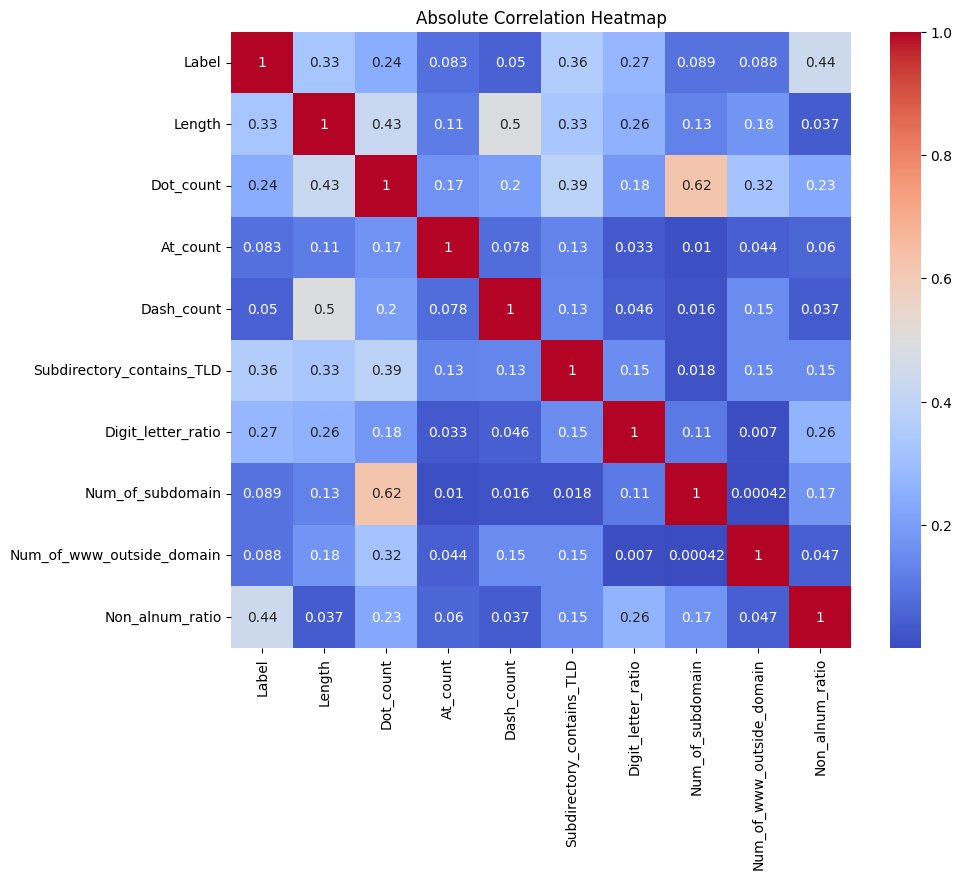

In [8]:
# absolute correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(absolute_corr, annot=True, cmap='coolwarm')
plt.title('Absolute Correlation Heatmap')
plt.show()

In [9]:
# prepare data
X = df.drop(columns=['Label', 'URL'])
y = df['Label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.9288223743388773


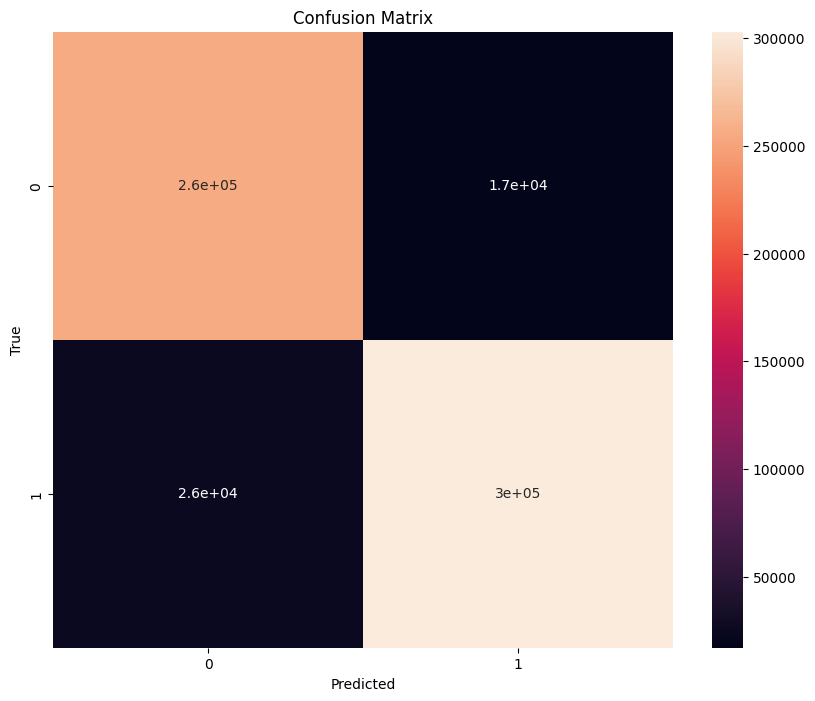

In [10]:
# random forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
